In [3]:
import torch
from torch.utils.data import Dataset, DataLoader

In [13]:
from torchvision.datasets import MNIST
from torchvision import transforms
import torch.nn.functional as F

composed_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: F.pad(x, (2, 2, 2, 2), mode='constant', value=0)),  # Pad from 28x28 to 32x32
])

dataset = MNIST("./data/", transform=composed_transforms, download=True)

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

torch.Size([1, 32, 32]) 5


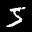

In [15]:
X, y = iter(dataset).__next__()
print(X.shape, y)
transforms.ToPILImage()(X)

In [25]:
from torch import nn

class LeNet5(nn.Module):
    
    def __init__(self) -> None:
        super().__init__()
        self.feature_extractor = nn.Sequential(
            # Input -> (batch_size,1,32,32)
            # Layer 1
            nn.Conv2d(
                in_channels=1, 
                out_channels=6,
                kernel_size=5,
                padding=2,
                stride=1), # -> (batch_size,6,28,28)
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2), # -> (batch_size,6,14,14)
            
            # Layer 2
            nn.Conv2d(
                in_channels=6,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=0), # -> (batch_size,16,10,10)
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2), # (batch_size,16,5,5)
        )
        self.fully_connected = nn.Sequential(
            nn.Flatten(), # (batch_size,400)
            nn.Linear(in_features=400, out_features=120), # (batch_size,401200)
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84), # (batch_size,84)
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10), # (batch_size,10)
        )
    
    def forward(self, x):
        return self.classifier(self.feature(x))
    
    
        

In [27]:
model = LeNet5()
model

LeNet5(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fully_connected): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): Tanh()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): Tanh()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)